[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/USERNAME/REPO/blob/BRANCH/PATH/TO/NOTEBOOK.ipynb) **Remember to complete the github path to make this link work**


# Getting started: intro to FiftyOne datasets

## Content overview

In this tutorial we cover the following concepts:

- [Dataset basics and samples](https://beta-docs.voxel51.com/getting_started/basic/datasets_samples_fields/)
- [Detection fields and labels](https://beta-docs.voxel51.com/api/fiftyone.core.labels.Detection.html)
- [Dataset views and filtering](https://beta-docs.voxel51.com/how_do_i/cheat_sheets/filtering_cheat_sheet/)


## Who is this for

This tutorial is designed for:

* Computer vision practitioners who are new to the FiftyOne app
* Anyone looking to integrate annotations into their visual datasets for analysis

## Assumed knowledge

### Computer vision concepts
- Basic knowledge of image processing

### Python skills
- Intermediate Python programming
- Experience working with Jupyter notebooks

## Time to complete
Estimated time: 30-45 minutes

## Required packages for local installation

If not running from a Google Colab environment, w recommend using a virtual environment with [FiftyOne installed](https://beta-docs.voxel51.com/getting_started/basic/install/).



In [1]:
# Run this cell to install FiftyOne on Google Colab
!pip install fiftyone==1.4.0 -q > /dev/null

In [2]:
# Import the FiftyOne library
import fiftyone as fo
# Check the version of fiftyone that has been installed
fo.__version__

'1.4.0'

## Inspecting the quickstart `Dataset`

In the FiftyOne dataset zoo, we have a collection of publicly available datasets that can be easily loaded and used for computer vision tasks. The `quickstart` dataset is a small dataset of 200 images with ground truth annotations and object detections that is commonly used for demonstrating the features of FiftyOne.

In [3]:
# Import the FiftyOne zoo for loading datasets
import fiftyone.zoo as foz

# Load the "quickstart" dataset from the FiftyOne zoo
# When we specify persistent = True, we make sure that changes to the dataset are saved
# in multiple Python sessions
dataset = foz.load_zoo_dataset("quickstart", persistent=True)

INFO:fiftyone.zoo.datasets:Downloading dataset to '/root/fiftyone/quickstart'


INFO:fiftyone.zoo.datasets.base:Downloading dataset...


 100% |████|  187.5Mb/187.5Mb [285.6ms elapsed, 0s remaining, 656.6Mb/s]      


INFO:eta.core.utils: 100% |████|  187.5Mb/187.5Mb [285.6ms elapsed, 0s remaining, 656.6Mb/s]      


Extracting dataset...


INFO:fiftyone.zoo.datasets.base:Extracting dataset...


Parsing dataset metadata


INFO:fiftyone.zoo.datasets.base:Parsing dataset metadata


Found 200 samples


INFO:fiftyone.zoo.datasets.base:Found 200 samples


Dataset info written to '/root/fiftyone/quickstart/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/quickstart/info.json'


Loading 'quickstart'


INFO:fiftyone.zoo.datasets:Loading 'quickstart'


 100% |█████████████████| 200/200 [7.6s elapsed, 0s remaining, 18.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 200/200 [7.6s elapsed, 0s remaining, 18.1 samples/s]      


Dataset 'quickstart' created


INFO:fiftyone.zoo.datasets:Dataset 'quickstart' created


In [4]:
# We can use the stats() method on a dataset to obtain info about its number of samples and size on disk
dataset.stats()

{'samples_count': 200,
 'samples_bytes': 1279162,
 'samples_size': '1.2MB',
 'total_bytes': 1279162,
 'total_size': '1.2MB'}

In [5]:
# The info field in the dataset can be used to add extra metada, here we are using it to specify where we go the dataset from and its license.
dataset.info["dataset_source"] = "https://docs.voxel51.com/dataset_zoo/datasets.html#dataset-zoo-quickstart"
# We specify that the license of the dataset is Creative Commons 4.0 (see https://creativecommons.org/licenses/by/4.0/deed.en)
dataset.info["dataset_license"] = "CC-BY-4.0"
dataset.info

{'dataset_source': 'https://docs.voxel51.com/dataset_zoo/datasets.html#dataset-zoo-quickstart',
 'dataset_license': 'CC-BY-4.0'}

In [6]:
# .count() tells us how many samples have been added to the dataset
dataset.count()

200

In [35]:
# In Fiftyone, a sample is an image and all its tags, metadata, and annotations
sample=dataset.first()
sample

<Sample: {
    'id': '67ea7c8918b838d9156c6f17',
    'media_type': 'image',
    'filepath': '/root/fiftyone/quickstart/data/000880.jpg',
    'tags': ['validation'],
    'metadata': None,
    'created_at': datetime.datetime(2025, 3, 31, 11, 29, 13, 271000),
    'last_modified_at': datetime.datetime(2025, 3, 31, 11, 29, 13, 271000),
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '5f452471ef00e6374aac53c8',
                'attributes': {},
                'tags': [],
                'label': 'bird',
                'bounding_box': [0.21084375, 0.0034375, 0.46190625, 0.9442083333333334],
                'mask': None,
                'mask_path': None,
                'confidence': None,
                'index': None,
                'area': 73790.37944999996,
                'iscrowd': 0.0,
            }>,
            <Detection: {
                'id': '5f452471ef00e6374aac53c9',
                'attributes': {},
               

## FiftyOne sample fields

In FiftyOne, a field is an attribute associated with each sample (e.g., image or video) in a dataset. Fields store labels, metadata, predictions, or custom data. Fields provide a way to organize and access information about your data within the FiftyOne framework. You can use fields to filter, sort, and analyze your dataset, and they play a role in tasks like model evaluation and data visualization. Some examples of built-in fields are `filepath`, `ground_truth`, and `predictions`, but you can also define your own custom fields to store any data you need.



In [8]:
# Here we can inspect the fields of the sample
sample.field_names

('id',
 'filepath',
 'tags',
 'metadata',
 'created_at',
 'last_modified_at',
 'ground_truth',
 'uniqueness',
 'predictions')

In [9]:
# The id of the sample is a hash that is unique for each image
sample.id

'67ea7c8918b838d9156c6f17'

In [10]:
# We  have a datetime object specifying when was the dataset created by us on disk
sample.created_at

datetime.datetime(2025, 3, 31, 11, 29, 13, 271000)

In [11]:
# sample.ground truth specifies the labels and positions of our object detections
sample.ground_truth

<Detections: {
    'detections': [
        <Detection: {
            'id': '5f452471ef00e6374aac53c8',
            'attributes': {},
            'tags': [],
            'label': 'bird',
            'bounding_box': [0.21084375, 0.0034375, 0.46190625, 0.9442083333333334],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'area': 73790.37944999996,
            'iscrowd': 0.0,
        }>,
        <Detection: {
            'id': '5f452471ef00e6374aac53c9',
            'attributes': {},
            'tags': [],
            'label': 'bird',
            'bounding_box': [0.74946875, 0.489375, 0.2164375, 0.23183333333333334],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'area': 3935.7593000000006,
            'iscrowd': 0.0,
        }>,
        <Detection: {
            'id': '5f452471ef00e6374aac53ca',
            'attributes': {},
     

In [12]:
# sample.predictions will give us the list of all bounding boxes that have been computed on the dataset already
# Note that each detection has a unique hash id, a label, a confidence level, and an associated bounding box
sample.predictions

<Detections: {
    'detections': [
        <Detection: {
            'id': '5f452c60ef00e6374aad9394',
            'attributes': {},
            'tags': [],
            'label': 'bird',
            'bounding_box': [
                0.22192673683166503,
                0.06093006531397502,
                0.4808845520019531,
                0.8937615712483724,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': 0.9750854969024658,
            'index': None,
        }>,
        <Detection: {
            'id': '5f452c60ef00e6374aad9395',
            'attributes': {},
            'tags': [],
            'label': 'bird',
            'bounding_box': [
                0.3962469816207886,
                0.006943931678930918,
                0.27418792247772217,
                0.46793556213378906,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': 0.759726881980896,
            'index': None,
        

In [13]:
# Notice that the sample.filepath points to the path to the image on the hardrive
# filepath is the only required sample field when creating our own datasets
sample.filepath

'/root/fiftyone/quickstart/data/000880.jpg'

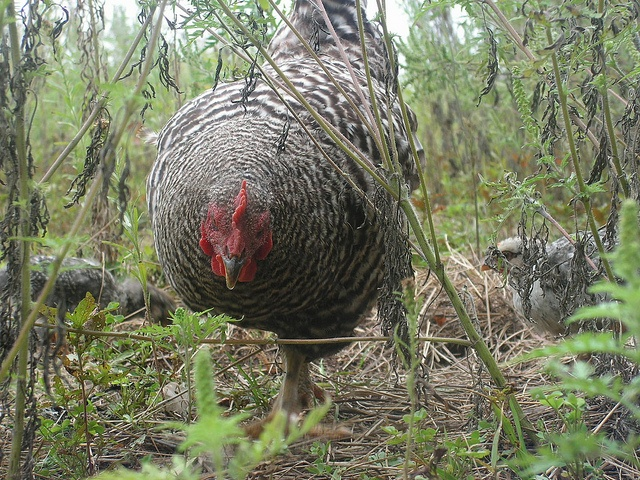

In [14]:
from PIL import Image
# As the file is local, we can open it with PIL, NumPy or PyTorch
original_sample = Image.open(sample.filepath)
original_sample

In [32]:
# We can add fields to our sample, in order to extend it
sample['inspected_in_notebook'] = True
sample.field_names

('id',
 'filepath',
 'tags',
 'metadata',
 'created_at',
 'last_modified_at',
 'ground_truth',
 'uniqueness',
 'predictions',
 'inspected_in_notebook')

In [37]:
# We can also add the field at the dataset level
dataset.add_sample_field("inspected_in_notebook", fo.BooleanField)

In [15]:
# In FiftyOne, files are loaded from disk, the images from the quickstart dataset are now in
# the hard drive of the computer running this notebook
from pathlib import Path
!ls {Path(sample.filepath).parent}

000002.jpg  000665.jpg	001312.jpg  002015.jpg	002592.jpg  003420.jpg	004095.jpg  004525.jpg
000008.jpg  000696.jpg	001348.jpg  002022.jpg	002597.jpg  003486.jpg	004096.jpg  004534.jpg
000020.jpg  000772.jpg	001394.jpg  002063.jpg	002598.jpg  003502.jpg	004126.jpg  004535.jpg
000031.jpg  000773.jpg	001429.jpg  002070.jpg	002640.jpg  003541.jpg	004131.jpg  004546.jpg
000035.jpg  000781.jpg	001430.jpg  002086.jpg	002645.jpg  003614.jpg	004170.jpg  004548.jpg
000058.jpg  000793.jpg	001586.jpg  002121.jpg	002660.jpg  003659.jpg	004172.jpg  004557.jpg
000083.jpg  000807.jpg	001587.jpg  002129.jpg	002671.jpg  003662.jpg	004180.jpg  004585.jpg
000089.jpg  000868.jpg	001599.jpg  002143.jpg	002748.jpg  003665.jpg	004222.jpg  004590.jpg
000145.jpg  000880.jpg	001614.jpg  002184.jpg	002799.jpg  003667.jpg	004253.jpg  004610.jpg
000164.jpg  000889.jpg	001624.jpg  002186.jpg	002823.jpg  003713.jpg	004255.jpg  004627.jpg
000191.jpg  000890.jpg	001631.jpg  002233.jpg	002869.jpg  003715.jpg	004263.jpg 

In [16]:
# When evaluating the dataset, we get a quick look at its attributes
dataset

Name:        quickstart
Media type:  image
Num samples: 200
Persistent:  True
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:       fiftyone.core.fields.FloatField
    predictions:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [17]:
# Our dataset consists of images and we have 200 samples of them
dataset.media_type, len(dataset)

('image', 200)

In [ ]:
# Launch the FiftyOne App and load the full dataset into it
session = fo.launch_app(dataset)

# Clone vs. Views in FiftyOne Datasets

In FiftyOne, both clones and views provide ways to work with datasets, but they serve different purposes:

## Clones

A clone is a complete copy of a dataset. When we clone a dataset in FiftyOne:

- Changes made to the clone do not affect the original dataset
- Clones are independent datasets with their own names in FiftyOne's MongoDB database
- All samples, fields, and metadata are fully copied into a clone

Here's how we would create a clone:




In [19]:
# Create a clone
cloned_dataset = dataset.clone("my-quickstart-clone")

In [20]:
# The clone will now appear in the list of available datasets
fo.list_datasets()

['my-quickstart-clone', 'quickstart']

In [21]:
cloned_dataset.first().filepath

'/root/fiftyone/quickstart/data/000880.jpg'

In [22]:
# Create a new sample
grayscale_sample =  Image.open(cloned_dataset.first().filepath).convert("L")

In [23]:
cloned_dataset

Name:        my-quickstart-clone
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:       fiftyone.core.fields.FloatField
    predictions:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

## Views

A view is a filtered subset of the FiftyOne dataset. When when we create a view:

- Changes to samples in the view will affect the original dataset
- It's not a separate dataset but a lens into the original dataset
- No data is duplicated; it's just a different way to access the source dataset
- Views are memory-efficient since they don't copy data
- Views can apply filters, sorting, and other operations to show only specific data

Views are useful to retrieve a subset of data, it's good to check out the [views cheat sheet](https://docs.voxel51.com/cheat_sheets/views_cheat_sheet.html).




## Slicing to create views

In [43]:
# Slicing is a way to create dataset views
# Here we select three samples from the dataset, starting at index 7
dataset[7:10]

Dataset:     quickstart
Media type:  image
Num samples: 3
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:            fiftyone.core.fields.DateTimeField
    last_modified_at:      fiftyone.core.fields.DateTimeField
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:            fiftyone.core.fields.FloatField
    predictions:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    inspected_in_notebook: fiftyone.core.fields.BooleanField
View stages:
    1. Skip(skip=7)
    2. Limit(limit=3)

## Using `ViewField` to create views

In [24]:
from fiftyone import ViewField as F

# Create a view that filters for images containing cats and sorts them
# by the number of cat detections in descending order.
cats_view = (
    dataset
    .select_fields("ground_truth")  # Select only the ground truth field
    .filter_labels("ground_truth", F("label") == "cat")  # Filter for samples where ground truth label is "cat"
    .sort_by(F("ground_truth.detections").length(), reverse=True)  # Sort by the number of detections in descending order
)

## Analogy to understand the difference between a dataset and a view

Think of a dataset as a library of books:
- **Clone**: Making a complete duplicate of the library in a new building. Changes to one library don't affect the other.
- **View**: Creating a reading list that references specific books in the original library. If you write notes in a book from the reading list, those notes appear in the original library's book too.

## When to Use Each

- Use **clones** when you need a complete backup or want to make extensive changes without affecting the original data
- Use **views** when you need to temporarily filter, sort, or manipulate a dataset without duplicating data or when you want changes to propagate to the original dataset

Does this explanation help clarify the differences between clones and views in FiftyOne?

## Creating a `DatasetView`

In [25]:
# We can use stats() on a dataset view to retrieve info on a subset of the data
cats_view.stats()

{'samples_count': 14,
 'samples_bytes': 6734,
 'samples_size': '6.6KB',
 'total_bytes': 6734,
 'total_size': '6.6KB'}

In [ ]:
# We can launch the app with a view, allowing us to filter the dataset
fo.launch_app(cats_view)

# `ViewField` in FiftyOne

A `ViewField` in FiftyOne is a dynamic field that computes its values on-the-fly rather than storing them directly in the dataset. Unlike regular fields that permanently store data, ViewFields are computed when accessed and don't persist any values to disk.

## Key characteristics of ViewFields

1. **Dynamic Computation**: Values are generated at access time through a user-defined function
2. **Non-persistent**: The values aren't stored in the database
3. **Memory Efficient**: Since values aren't stored, they don't increase dataset storage requirements
4. **Function-based**: Each `ViewField` is backed by a Python function that determines its values

## How ViewFields Work

When you define a `ViewField`, you provide a function that specifies how to compute the field's value for each sample. The function typically takes a sample as input and returns the desired value based on other fields in that sample.

Here's a basic example of creating a `ViewField` in Python:



In [51]:
from fiftyone import ViewField as F

# Create a view that filters for predictions with confidence higher than 0.999
high_confidence_view = dataset.filter_labels(
    "predictions", F("confidence") > 0.999,
    only_matches = True
)

high_confidence_view

Dataset:     quickstart
Media type:  image
Num samples: 48
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:            fiftyone.core.fields.DateTimeField
    last_modified_at:      fiftyone.core.fields.DateTimeField
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:            fiftyone.core.fields.FloatField
    predictions:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    inspected_in_notebook: fiftyone.core.fields.BooleanField
View stages:
    1. FilterLabels(field='predictions', filter={'$gt': ['$$this.confidence', 0.999]}, only_matches=True, trajectories=False)

In [ ]:
fo.launch_app(high_confidence_view)

## Common Uses for ViewFields

1. **Derived Measurements**: Computing values based on existing fields (like aspect ratios from dimensions)
2. **Conditional Logic**: Creating fields that depend on complex conditions
3. **Temporary Analysis**: When you need a calculated field for analysis but don't want to permanently store it
4. **Data Transformations**: Applying transformations to existing fields without modifying the original data

## Comparison to Regular Fields

| Feature | ViewField | Regular Field |
|---------|-----------|---------------|
| Storage | Not stored on disk | Stored in the dataset |
| Persistence | Temporary | Permanent (unless deleted) |
| Computation | Dynamic (on access) | Static (pre-computed) |
| Performance | Slower (computed each time) | Faster (direct lookup) |
| Memory Usage | Lower | Higher |

ViewFields provide flexibility when working with FiftyOne datasets by allowing you to create computed properties without increasing storage requirements, making them ideal for exploratory data analysis and temporary transformations.

## Summary

This tutorial covered:

- Loading datasets from the FiftyOne Dataset Zoo.
- Inspecting dataset samples and fields.
- Cloning datasets for independent copies.
- Creating dataset views for filtering and sorting.
- Using [`ViewField`]() for dynamic computations.
- Launching the FiftyOne app from different dataset subsets and views.

